In [1]:
from typing import Optional, List, Tuple
import pandas as pd
import os
import numpy as np

In [2]:
def load_data(func_name: Optional[str] = None, data_directory: str = "../new_datasets") -> List[Tuple[str, pd.DataFrame]]:
    """
    Load data from CSV files for specified function or all functions
    
    Args:
        func_name: Name of specific function to load (None for all functions)
        data_directory: Directory path containing the dataset CSV files
    
    Returns:
        List of tuples with (function_name, dataframe)
    """
    # Check if directory exists
    if not os.path.isdir(data_directory):
        print(f"Warning: Data directory '{data_directory}' not found")
        return []
    
    test_func = [func for func in os.listdir(data_directory) if func.endswith(".csv")]
    test_func = [func.replace(".csv", "") for func in test_func]
    data_list = []
    target_funcs = [func_name] if func_name else test_func
    
    for func in target_funcs:
        try:
            data = pd.read_csv(os.path.join(data_directory, f"{func}.csv"))
            data_list.append((func, data))
        except FileNotFoundError:
            print(f"Warning: No data file found for function {func}")
    
    return data_list

atan_div
(961, 3)


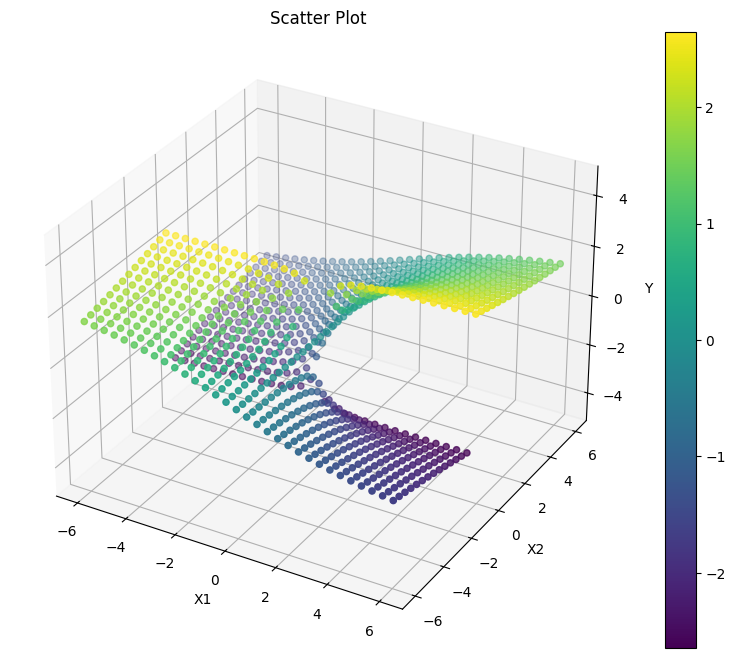

atan_plus_x
(1000, 2)


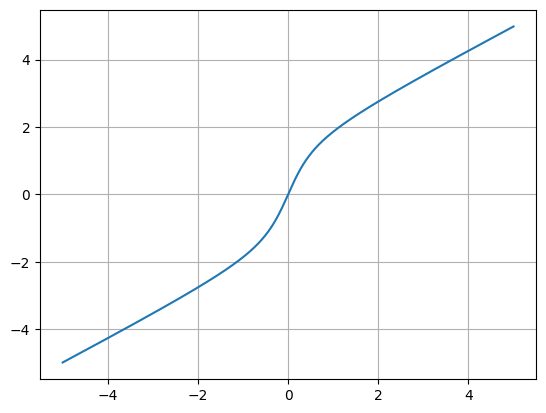

exp_times_sin_1d
(1000, 2)


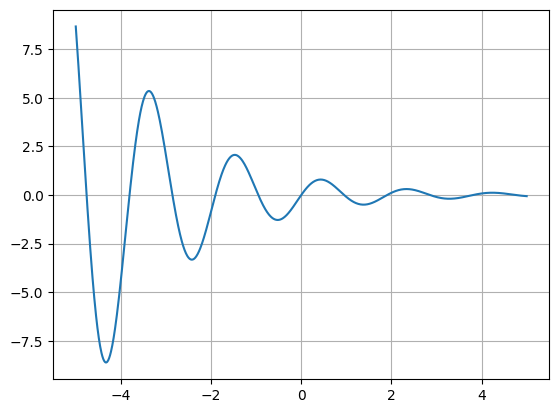

gaussian_2d
(961, 3)


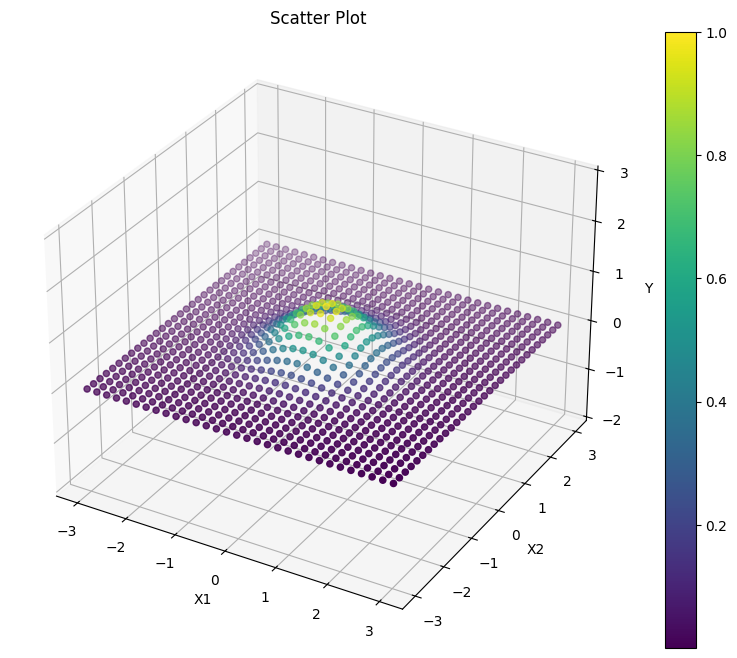

parallel
(961, 3)


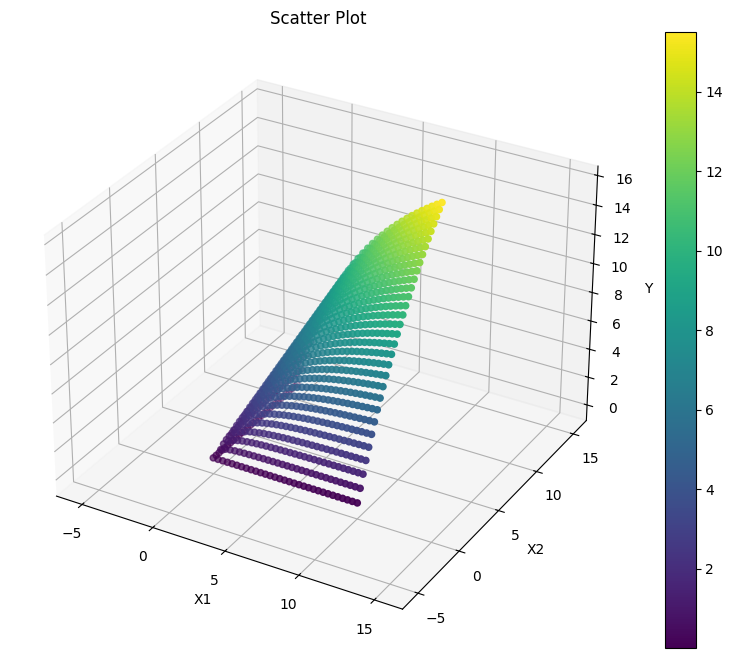

polynomial
(1000, 2)


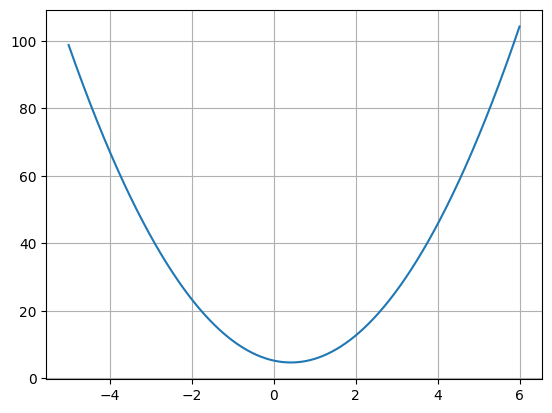

power_diff
(961, 3)


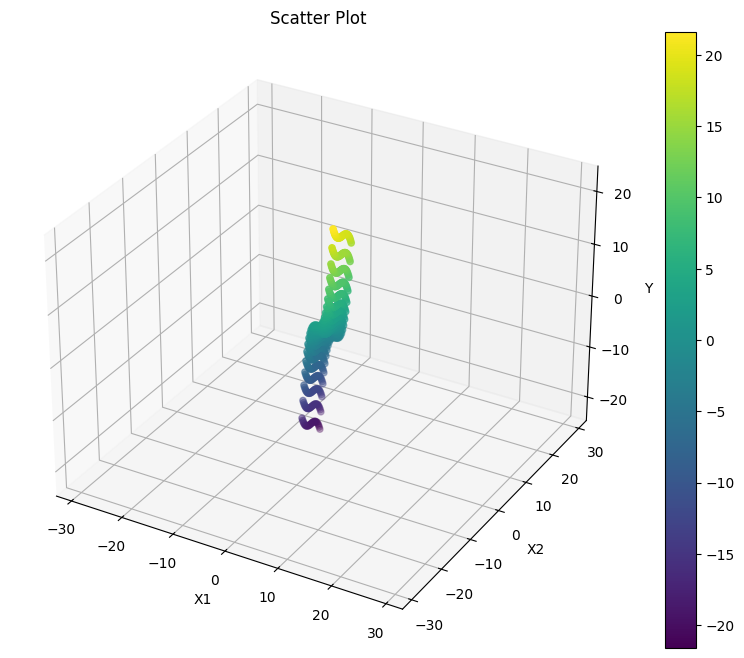

quad_surface
(961, 3)


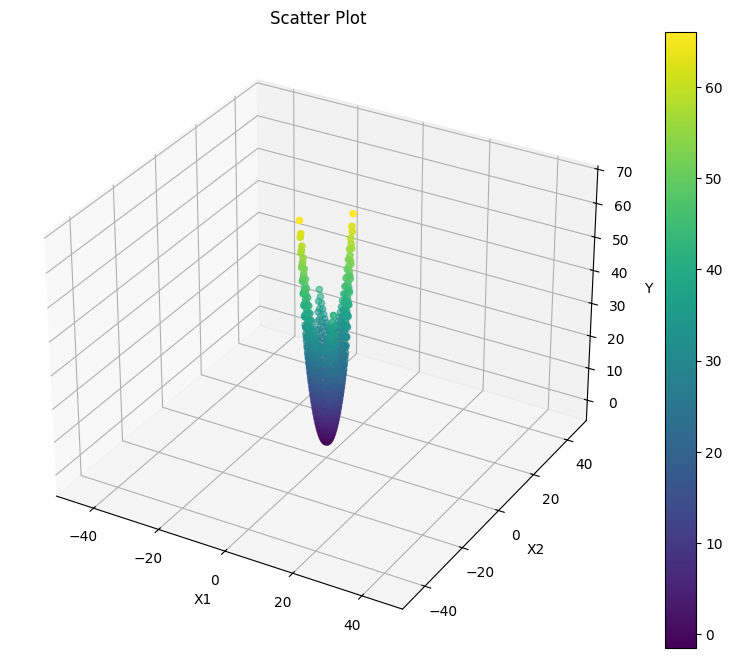

rational_func
(1000, 2)


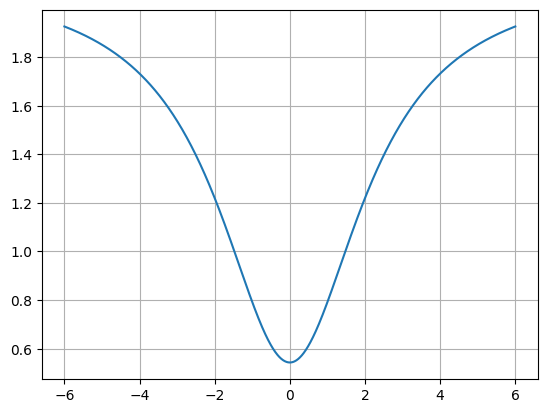

sin_plus_x
(1000, 2)


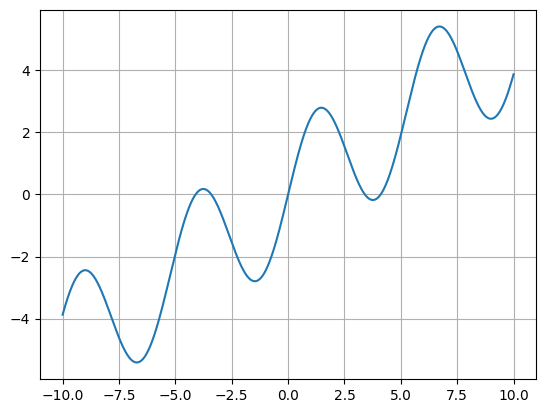

sin_times_exp_2d
(6200, 3)


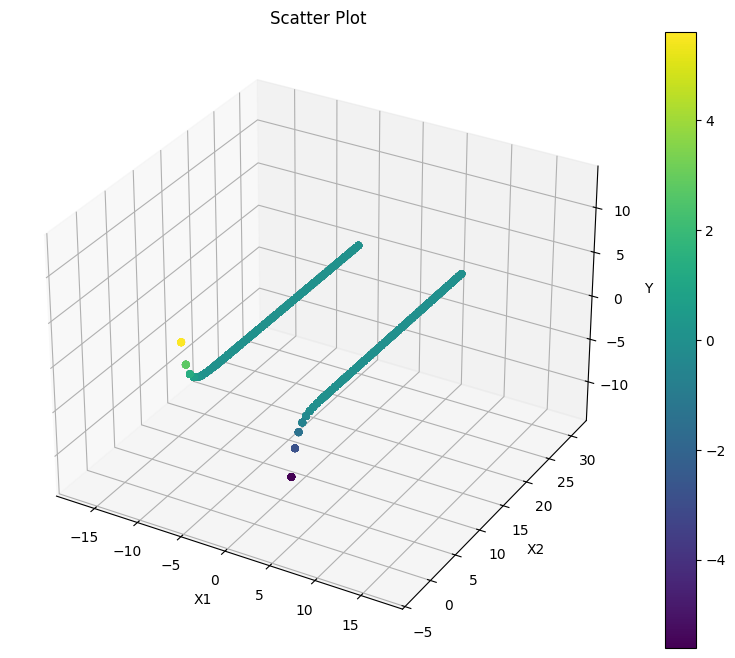

In [3]:
from sr.visual import plot_3d_scatter, plot_2d_scatter
import matplotlib.pyplot as plt
data = load_data(data_directory='datasets_bc_new')
# print(data)
# print(data[0][1])
# data = np.array(data[0][1])
for dataset in data:    
    print(dataset[0])
    ds = np.array(dataset[1])
    print(ds.shape)
    if ds.shape[1] == 2:
        # plot_2d_scatter(ds)
        plt.plot(ds[:, 0], ds[:, 1])
        plt.grid()
        plt.show()
    elif ds.shape[1] == 3:
        plot_3d_scatter(ds[:, :-1], ds[:, -1])
    else:
        raise ValueError(f"Invalid number of columns: {ds.shape[1]}")